In [1]:
# import trax
# from trax import layers as tl
# import trax.fastmath.numpy as fastnp
# from trax.supervised import training
from functools import partial
import numpy as np
from itertools import combinations
import random as rnd
from random import sample
import json
import sklearn.metrics as metrics
from sklearn.metrics import classification_report , confusion_matrix, roc_auc_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import copy
import torch
import os
import warnings
from scipy.spatial import distance
from os import walk
from transformers import AutoTokenizer, AutoModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#initialize codebert
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model_codebert = AutoModel.from_pretrained("microsoft/codebert-base").to(device)
np.random.seed(777)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from os import walk

from transformers import AutoModelForCausalLM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [4]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [5]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Get the count of unique values in the 'projects' column
unique_projects_counts = data['project'].value_counts()

# Filter and display the projects with more than 300 counts
filtered_projects = unique_projects_counts[unique_projects_counts > 30]
print(filtered_projects)


project
dubbo                     170
hadoop                    146
nifi                      139
junit-quickcheck          131
ormlite-core              113
admiral                   109
wildfly                    84
Mapper                     75
fastjson                   64
typescript-generator       60
Chronicle-Wire             59
Java-WebSocket             54
biojava                    51
spring-boot                48
visualee                   47
hbase                      47
innodb-java-reader         45
adyen-java-api-library     45
spring-hateoas             41
hive                       41
DataflowTemplates          39
esper                      38
spring-data-r2dbc          37
openhtmltopdf              35
nacos                      32
Name: count, dtype: int64


In [6]:
label_to_int_pre= {
    'OD': 0,
    'NIO': 1,
    'ID': 2,
    'NDOD': 3,
    'NOD': 4,
    'UD':5
}
int_to_label_pre = {
    0: 'OD',
    1: 'NIO',
    2: 'ID',
    3: 'NDOD',
    4: 'NOD',
    5: 'UD',
}

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame that includes all the data
# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Specify the project name you want to include
project_name = "hbase"

# Assuming 'data' is your DataFrame that includes all the data
project_data = data[data['project'] == project_name]

# Extract the relevant fields: 'preprocessed_code' and 'category'
relevant_data = project_data[['preprocessed_code', 'category']]

# Filter the data to include only categories 1, 2, 3, and 4 (up to 5 if needed)
filtered_data = relevant_data[relevant_data['category'].isin([2, 3, 4])]

# Split the data into training and validation sets, stratifying by 'category' to ensure all categories are represented
train_data, valid_data = train_test_split(filtered_data, test_size=0.2, random_state=42, stratify=filtered_data['category'])

# Mapping from integers to labels

# Replace category numbers with category labels
train_data['category'] = train_data['category'].map(int_to_label_pre)
valid_data['category'] = valid_data['category'].map(int_to_label_pre)

# Extract buggy code and categories for train and validation sets
train_buggy_code = train_data['preprocessed_code'].tolist()
valid_buggy_code = valid_data['preprocessed_code'].tolist()
train_categories = train_data['category'].tolist()
valid_categories = valid_data['category'].tolist()

# Print the splits for verification
print("Train buggy code:", len(train_buggy_code))
print("Validation buggy code:", len(valid_buggy_code))
print("Train categories:", len(train_categories))
print("Validation categories:", len(valid_categories))


Train buggy code: 35
Validation buggy code: 9
Train categories: 35
Validation categories: 9


In [8]:
print("Unique categories in training set:", set(train_categories))
print("Unique categories in validation set:", set(valid_categories))


Unique categories in training set: {'NOD', 'NDOD', 'ID'}
Unique categories in validation set: {'NOD', 'NDOD', 'ID'}


In [9]:
label_to_int= {
    'ID': 0,
    'NDOD': 1,
    'NOD': 2
}

In [10]:
from torch.utils.data import Dataset
import numpy as np
import random
import torch

class SiameseDataset(Dataset):
    def __init__(self, train_buggy_code, valid_buggy_code, tokenizer, codebert, categories, split):
        self.train_buggy_code = train_buggy_code
        self.valid_buggy_code = valid_buggy_code
        self.tokenizer = tokenizer
        self.codebert = codebert.to(device)
        self.categories = categories
        self.split = split
        self.m_len = self.calculate_max_output_length()
        
        # Preprocess categories to map labels to indices
        self.label_to_indices = {}
        for index, category in enumerate(categories):
            if category not in self.label_to_indices:
                self.label_to_indices[category] = []
            self.label_to_indices[category].append(index)

        # For negative sampling
        self.labels = categories
        self.unique_labels = list(set(self.labels))
        
    def calculate_max_output_length(self):
        max_length = 0
        for code in self.train_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_train = length
        for code in self.valid_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_valid = length
        if max_length_train > max_length_valid:
            return max_length_train
        else:
            return max_length_valid

    def simulate_process_length(self, snippet):
        # Calculate how many segments would be needed
        encoded_input = self.tokenizer.encode(snippet, add_special_tokens=True)
        # Each segment processes up to 512 tokens (max length for BERT models)
        num_segments = (len(encoded_input) + 511) // 512  # 512 tokens per segment, including CLS and SEP
        return num_segments * 768
    def __len__(self):
        if self.split == 'train':
            return len(self.train_buggy_code)
        else:
            return len(self.valid_buggy_code)

    def __getitem__(self, idx):
        if self.split == 'train':
            # Anchor label
            anchor_label = self.categories[idx]

            # Positive sample
            positive_idx = idx
            while positive_idx == idx:  # Ensure different indices for anchor and positive
                positive_idx = random.choice(self.label_to_indices[anchor_label])

            # Negative sample
            negative_label = random.choice([lab for lab in self.unique_labels if lab != anchor_label])
            negative_idx = random.choice(self.label_to_indices[negative_label])

            anchor = self._process_snippet(self.train_buggy_code[idx])
            positive = self._process_snippet(self.train_buggy_code[positive_idx])
            negative = self._process_snippet(self.train_buggy_code[negative_idx])
            
            if len(anchor) <= 768:
                short_data = True
            else:
                short_data = False
                


            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'positive':torch.nn.functional.pad(positive, (0, self.m_len - positive.size(0))),
                'negative': torch.nn.functional.pad(negative, (0, self.m_len - negative.size(0))),
                'label': label_to_int[anchor_label],  # Optional, depends on how you want to use it
                'short_data_flag': short_data
            }
        elif self.split == 'val':
            anchor_label = self.categories[idx]
            anchor = self._process_snippet(self.valid_buggy_code[idx])
            
            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'label': label_to_int[anchor_label]  # Optional, depends on how you want to use it
            }

        
    def _process_snippet(self, snippet):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Tokenize input without the max_length constraint
        inputs = self.tokenizer(snippet, return_tensors='pt').to(device)

        if inputs['input_ids'].shape[1] < 512:
            with torch.no_grad():
                outs = self.codebert(**inputs)
            cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
            return cls  # Move to CPU to save GPU memory
        else:
            total_length = inputs['input_ids'].shape[1]
            parts = []
            step_size = 100
            chunk_size = 512

            for start_index in range(0, total_length, step_size):
                end_index = min(start_index + chunk_size, total_length)
                input_segment = {key: val[:, start_index:end_index].to(device) for key, val in inputs.items()}

                with torch.no_grad():
                    output_segment = self.codebert(**input_segment)
                cls_segment = output_segment.last_hidden_state[:, 0, :].squeeze().detach()
                parts.append(cls_segment)  # Move to CPU

            concatenated_parts = torch.cat(parts, dim=0)
            return concatenated_parts

In [11]:
# Create instances of the custom dataset class
train_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, train_categories, 'train')
val_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, valid_categories, 'val')

# Create dataloaders for training and validation
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Print the lengths of the dataloaders for verification
print("Train dataloader length:", len(train_dataloader))
print("Validation dataloader length:", len(val_dataloader))

Token indices sequence length is longer than the specified maximum sequence length for this model (631 > 512). Running this sequence through the model will result in indexing errors


Train dataloader length: 5
Validation dataloader length: 2


In [12]:
import numpy as np

def sample_triplet_data(data, sample_size_ratio):
    """
    Samples a subset of triplet data (anchor, positive, negative) while preserving class distribution.
    
    Parameters:
    - data: list of dictionaries, where each dictionary has keys 'anchor', 'positive', 'negative', 'label'.
    - sample_size_ratio: float, the fraction of the data to sample (0 < sample_size_ratio <= 1).
    
    Returns:
    - sampled_data: list of dictionaries, the sampled subset of the original data.
    """
    # Extract labels to understand the class distribution
    labels = [item['label'] for item in data]
    unique_classes = np.unique(labels)
    
    sampled_data = []
    
    for cls in unique_classes:
        # Find all items belonging to the current class
        class_items = [item for item in data if item['label'] == cls]
        # Calculate the number of items to sample from this class
        num_samples = int(np.ceil(len(class_items) * sample_size_ratio))
        # Randomly sample items without replacement
        sampled_items = np.random.choice(class_items, size=num_samples, replace=False)
        # Append the sampled items to the output list
        sampled_data.extend(sampled_items)
    
    # Optionally, shuffle the sampled dataset to mix classes
    np.random.shuffle(sampled_data)

    return sampled_data


In [13]:
import gc
from tqdm import tqdm
plot_data = []
plot_labels = []
short_data_flags = []
for item in tqdm(train_dataset):
    
    plot_data.append(item['anchor'])
    plot_labels.append(item['label'])
    short_data_flags.append(item['short_data_flag'])

100%|██████████| 35/35 [00:00<00:00, 56.31it/s]


In [14]:
m_len = plot_data[0].shape[0]

In [15]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']  
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap
cc = LinearSegmentedColormap.from_list("cc", colors, N=5)


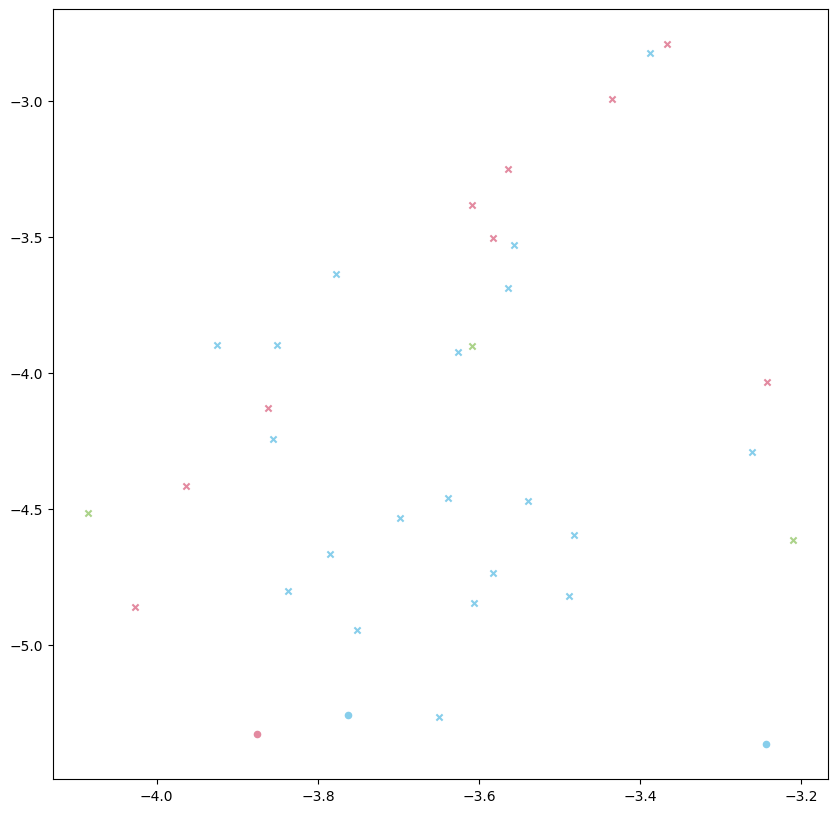

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
import numpy as np

# Assuming X, plot_data, and plot_labels are defined as before
# Also assuming bool_values is your list/array of boolean values

X = torch.stack(plot_data).cpu().numpy()

# Extract labels for each point
labelsNums = plot_labels

# Perform t-SNE dimensionality reduction
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

# Assuming 'cc' is a colormap, you might need to adjust this to fit your actual colormap variable
# Generate an array of colors for each label
unique_labels = np.unique(labelsNums)
colors = plt.cm.get_cmap(cc, len(unique_labels))  # Adjust 'cc' as needed to your colormap name
label_to_color = {label: colors(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
colors_array = np.array([label_to_color[label] for label in labelsNums])

# Create the scatter plot
plt.figure(figsize=(10, 10))

# Iterate through each datapoint
for i in range(len(X_embedded)):
    marker = 'x' if short_data_flags[i] else 'o'  # Choose the marker based on the boolean value
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors_array[i], s=20, alpha=1, marker=marker)

# Set the background color to black
# plt.gca().set_facecolor('white')
# # Adjust the color of the ticks and labels for better visibility
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.xlabel('Component 1', color='white')
# plt.ylabel('Component 2', color='white')

plt.show()


In [17]:
# Load the CodeBERT tokenizer (adjust the model_name as needed)
model_name = "microsoft/codebert-base"
codebert_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


class SiameseNetwork(nn.Module):
    def __init__(self, embedding_size):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(embedding_size, int(embedding_size/2)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/2), int(embedding_size/4)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/4), embedding_size)
        )

    def forward(self, x):
        output = self.fc(x)
        return output

In [18]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = (anchor - positive).pow(2).sum(1)
        distance_negative = (anchor - negative).pow(2).sum(1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean()

In [19]:
learning_rate = 1e-5
num_epochs = 450
embed_size = m_len  # This should match the output size of CodeBERT
siamese_network = SiameseNetwork(embed_size).to(device)
criterion = TripletLoss(margin=1.0)
optimizer = optim.Adam(siamese_network.parameters(), lr=learning_rate)
triplet_loss = TripletLoss().to(device)

In [20]:
# from transformers import get_linear_schedule_with_warmup
# warmup_Frac = 0.1
# total_iter = num_epochs * len(train_dataloader)
# scheduler = get_linear_schedule_with_warmup(optimizer, int(warmup_Frac * total_iter), total_iter)

In [21]:
from tqdm import tqdm
best_loss = 100.0
num_epochs = 300
epoch_loss_list = []
model_name = "FlakyXbert_IDoFT_project_" + project_name + '_final.pth'
for epoch in range(num_epochs):
    total_loss = 0.0
    siamese_network.train()
    for batch in tqdm(train_dataloader):

        labels = (batch['label']).to(device)
        batch_anchor = (batch['anchor']).to(device)
        batch_positive = (batch['positive']).to(device)
        batch_negative = (batch['negative']).to(device)

        anchor_output = siamese_network(batch_anchor)
        positive_out = siamese_network(batch_positive)
        negative_out = siamese_network(batch_negative)

        loss = criterion(anchor_output, positive_out, negative_out)
        optimizer.zero_grad()
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(siamese_network.parameters(), max_norm=2.0)        
        optimizer.step()
        # scheduler.step()

        total_loss += loss.item()
        if total_loss <= best_loss:
            # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
            print("Loss improved saving model")
            torch.save(siamese_network.state_dict(), model_name)
            best_loss = total_loss
        
            
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    # The line `epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")` is attempting to append a formatted string to a list named `epoch_loss_list`. This string contains information about the current epoch number, total number of epochs, and the average loss calculated for that epoch. However, in the provided code snippet, the `epoch_loss_list` list is not defined or used anywhere else in the code.
    epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    

 60%|██████    | 3/5 [00:00<00:00, 10.27it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.77it/s]


Epoch 1/300, Loss: 1.0016380906105042


100%|██████████| 5/5 [00:00<00:00, 10.31it/s]


Epoch 2/300, Loss: 0.9920217156410217


 20%|██        | 1/5 [00:00<00:00,  9.01it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.21it/s]


Epoch 3/300, Loss: 1.0278674364089966


100%|██████████| 5/5 [00:00<00:00, 10.40it/s]


Epoch 4/300, Loss: 0.9764353156089782


100%|██████████| 5/5 [00:00<00:00, 12.12it/s]


Epoch 5/300, Loss: 0.9976379036903381


100%|██████████| 5/5 [00:00<00:00, 11.24it/s]


Epoch 6/300, Loss: 1.0020522236824037


100%|██████████| 5/5 [00:00<00:00, 13.29it/s]


Epoch 7/300, Loss: 0.955719816684723


100%|██████████| 5/5 [00:00<00:00, 12.51it/s]


Epoch 8/300, Loss: 0.9733655095100403


100%|██████████| 5/5 [00:00<00:00, 13.27it/s]


Epoch 9/300, Loss: 0.9743720531463623


 20%|██        | 1/5 [00:00<00:00,  9.32it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.84it/s]


Epoch 10/300, Loss: 0.9744073152542114


100%|██████████| 5/5 [00:00<00:00, 11.77it/s]


Epoch 11/300, Loss: 0.9792295336723328


100%|██████████| 5/5 [00:00<00:00, 12.13it/s]


Epoch 12/300, Loss: 0.9693803071975708


100%|██████████| 5/5 [00:00<00:00, 11.84it/s]


Epoch 13/300, Loss: 0.9716442823410034


100%|██████████| 5/5 [00:00<00:00,  8.50it/s]


Epoch 14/300, Loss: 0.9970300555229187


100%|██████████| 5/5 [00:00<00:00, 10.85it/s]


Epoch 15/300, Loss: 0.968385124206543


100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


Epoch 16/300, Loss: 0.98805730342865


100%|██████████| 5/5 [00:00<00:00, 10.73it/s]


Epoch 17/300, Loss: 1.0059243083000182


100%|██████████| 5/5 [00:00<00:00, 11.22it/s]


Epoch 18/300, Loss: 0.9988184452056885


100%|██████████| 5/5 [00:00<00:00, 11.97it/s]


Epoch 19/300, Loss: 0.9649419665336609


100%|██████████| 5/5 [00:00<00:00, 11.07it/s]


Epoch 20/300, Loss: 0.9784057855606079


 20%|██        | 1/5 [00:00<00:00,  8.05it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.58it/s]


Epoch 21/300, Loss: 0.9334003329277039


100%|██████████| 5/5 [00:00<00:00, 10.47it/s]


Epoch 22/300, Loss: 0.9625654220581055


100%|██████████| 5/5 [00:00<00:00, 11.27it/s]


Epoch 23/300, Loss: 1.0129628896713256


100%|██████████| 5/5 [00:00<00:00, 11.01it/s]


Epoch 24/300, Loss: 0.962921941280365


100%|██████████| 5/5 [00:00<00:00, 11.80it/s]


Epoch 25/300, Loss: 0.933859932422638


100%|██████████| 5/5 [00:00<00:00, 10.30it/s]


Epoch 26/300, Loss: 0.9988944172859192


100%|██████████| 5/5 [00:00<00:00, 12.02it/s]


Epoch 27/300, Loss: 0.9173004508018494


100%|██████████| 5/5 [00:00<00:00, 13.91it/s]


Epoch 28/300, Loss: 0.9634865045547485


100%|██████████| 5/5 [00:00<00:00, 10.36it/s]


Epoch 29/300, Loss: 1.0084720373153686


 40%|████      | 2/5 [00:00<00:00, 10.49it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.69it/s]


Epoch 30/300, Loss: 1.021996521949768


100%|██████████| 5/5 [00:00<00:00, 10.92it/s]


Epoch 31/300, Loss: 0.9395918011665344


100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


Epoch 32/300, Loss: 0.9243782997131348


100%|██████████| 5/5 [00:00<00:00, 10.87it/s]


Epoch 33/300, Loss: 0.8975855350494385


100%|██████████| 5/5 [00:00<00:00, 10.70it/s]


Epoch 34/300, Loss: 0.9722988486289978


100%|██████████| 5/5 [00:00<00:00, 12.41it/s]


Epoch 35/300, Loss: 0.8628288626670837


100%|██████████| 5/5 [00:00<00:00,  8.22it/s]


Epoch 36/300, Loss: 0.8567268967628479


100%|██████████| 5/5 [00:00<00:00,  9.39it/s]


Epoch 37/300, Loss: 0.9576116085052491


100%|██████████| 5/5 [00:00<00:00, 10.74it/s]


Epoch 38/300, Loss: 0.8927386164665222


100%|██████████| 5/5 [00:00<00:00, 10.27it/s]


Epoch 39/300, Loss: 0.9150997757911682


 20%|██        | 1/5 [00:00<00:00,  9.25it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.57it/s]


Epoch 40/300, Loss: 0.8415335297584534


100%|██████████| 5/5 [00:00<00:00, 11.60it/s]


Epoch 41/300, Loss: 0.843084967136383


100%|██████████| 5/5 [00:00<00:00, 11.87it/s]


Epoch 42/300, Loss: 0.9280067801475524


100%|██████████| 5/5 [00:00<00:00, 11.21it/s]


Epoch 43/300, Loss: 0.917204225063324


100%|██████████| 5/5 [00:00<00:00, 11.46it/s]


Epoch 44/300, Loss: 0.9024586319923401


100%|██████████| 5/5 [00:00<00:00, 11.62it/s]


Epoch 45/300, Loss: 0.985360074043274


100%|██████████| 5/5 [00:00<00:00, 10.15it/s]


Epoch 46/300, Loss: 0.9929328441619873


100%|██████████| 5/5 [00:00<00:00, 11.52it/s]


Epoch 47/300, Loss: 0.893085241317749


100%|██████████| 5/5 [00:00<00:00, 12.98it/s]


Epoch 48/300, Loss: 0.8411131501197815


100%|██████████| 5/5 [00:00<00:00, 10.40it/s]


Epoch 49/300, Loss: 0.9597984552383423


 40%|████      | 2/5 [00:00<00:00, 11.44it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.17it/s]


Epoch 50/300, Loss: 0.8076636672019959


 40%|████      | 2/5 [00:00<00:00, 13.26it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.32it/s]


Epoch 51/300, Loss: 0.8009477496147156


100%|██████████| 5/5 [00:00<00:00, 12.90it/s]


Epoch 52/300, Loss: 0.7914414763450622


100%|██████████| 5/5 [00:00<00:00, 11.92it/s]


Epoch 53/300, Loss: 0.7960103392601013


100%|██████████| 5/5 [00:00<00:00, 11.91it/s]


Epoch 54/300, Loss: 0.8499750852584839


100%|██████████| 5/5 [00:00<00:00, 12.91it/s]


Epoch 55/300, Loss: 0.9441802382469178


100%|██████████| 5/5 [00:00<00:00, 11.28it/s]


Epoch 56/300, Loss: 0.9166553497314454


 40%|████      | 2/5 [00:00<00:00, 16.14it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.08it/s]


Epoch 57/300, Loss: 0.8039940416812896


100%|██████████| 5/5 [00:00<00:00, 11.92it/s]


Epoch 58/300, Loss: 0.9377370357513428


100%|██████████| 5/5 [00:00<00:00, 11.84it/s]


Epoch 59/300, Loss: 0.7919472217559814


100%|██████████| 5/5 [00:00<00:00,  9.36it/s]


Epoch 60/300, Loss: 0.9715476036071777


100%|██████████| 5/5 [00:00<00:00, 11.85it/s]


Epoch 61/300, Loss: 0.8489517450332642


100%|██████████| 5/5 [00:00<00:00, 10.68it/s]


Epoch 62/300, Loss: 0.8672629356384277


100%|██████████| 5/5 [00:00<00:00, 12.54it/s]


Epoch 63/300, Loss: 0.8454507350921631


100%|██████████| 5/5 [00:00<00:00, 11.46it/s]


Epoch 64/300, Loss: 0.8070536851882935


100%|██████████| 5/5 [00:00<00:00, 11.08it/s]


Epoch 65/300, Loss: 0.8021662950515747


100%|██████████| 5/5 [00:00<00:00, 11.89it/s]


Epoch 66/300, Loss: 0.7581171989440918


100%|██████████| 5/5 [00:00<00:00, 12.24it/s]


Epoch 67/300, Loss: 0.7577861309051513


100%|██████████| 5/5 [00:00<00:00, 12.89it/s]


Epoch 68/300, Loss: 0.8226253151893616


 40%|████      | 2/5 [00:00<00:00, 11.63it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 14.74it/s]


Epoch 69/300, Loss: 0.8064773559570313


100%|██████████| 5/5 [00:00<00:00, 12.45it/s]


Epoch 70/300, Loss: 0.6767604947090149


100%|██████████| 5/5 [00:00<00:00, 11.33it/s]


Epoch 71/300, Loss: 0.8859308004379273


100%|██████████| 5/5 [00:00<00:00, 11.30it/s]


Epoch 72/300, Loss: 0.7695669889450073


100%|██████████| 5/5 [00:00<00:00, 10.21it/s]


Epoch 73/300, Loss: 0.7493278384208679


 40%|████      | 2/5 [00:00<00:00, 15.04it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.10it/s]


Epoch 74/300, Loss: 0.7211570084095001


100%|██████████| 5/5 [00:00<00:00,  8.59it/s]


Epoch 75/300, Loss: 0.636455750465393


100%|██████████| 5/5 [00:00<00:00, 12.38it/s]


Epoch 76/300, Loss: 0.6097941517829895


100%|██████████| 5/5 [00:00<00:00,  9.61it/s]


Epoch 77/300, Loss: 0.7545550107955933


100%|██████████| 5/5 [00:00<00:00, 13.50it/s]


Epoch 78/300, Loss: 0.7368994235992432


100%|██████████| 5/5 [00:00<00:00, 12.36it/s]


Epoch 79/300, Loss: 0.6782450914382935


100%|██████████| 5/5 [00:00<00:00, 11.74it/s]


Epoch 80/300, Loss: 0.7228074312210083


100%|██████████| 5/5 [00:00<00:00,  9.73it/s]


Epoch 81/300, Loss: 0.7672159731388092


100%|██████████| 5/5 [00:00<00:00, 10.24it/s]


Epoch 82/300, Loss: 0.7365663051605225


100%|██████████| 5/5 [00:00<00:00, 12.71it/s]


Epoch 83/300, Loss: 0.6726973652839661


100%|██████████| 5/5 [00:00<00:00, 11.85it/s]


Epoch 84/300, Loss: 0.6146967291831971


100%|██████████| 5/5 [00:00<00:00, 13.05it/s]


Epoch 85/300, Loss: 0.700615930557251


100%|██████████| 5/5 [00:00<00:00, 11.73it/s]


Epoch 86/300, Loss: 0.6758565604686737


100%|██████████| 5/5 [00:00<00:00, 10.31it/s]


Epoch 87/300, Loss: 0.8014876842498779


 40%|████      | 2/5 [00:00<00:00, 11.25it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.05it/s]


Epoch 88/300, Loss: 0.5088296413421631


100%|██████████| 5/5 [00:00<00:00, 13.01it/s]


Epoch 89/300, Loss: 0.7356473326683044


100%|██████████| 5/5 [00:00<00:00, 10.02it/s]


Epoch 90/300, Loss: 0.6559887707233429


100%|██████████| 5/5 [00:00<00:00, 11.56it/s]


Epoch 91/300, Loss: 0.6969604849815368


100%|██████████| 5/5 [00:00<00:00,  9.95it/s]


Epoch 92/300, Loss: 0.7268264532089234


100%|██████████| 5/5 [00:00<00:00, 10.21it/s]


Epoch 93/300, Loss: 0.5972906202077866


100%|██████████| 5/5 [00:00<00:00, 11.72it/s]


Epoch 94/300, Loss: 0.6335611343383789


100%|██████████| 5/5 [00:00<00:00,  9.30it/s]


Epoch 95/300, Loss: 0.5574728071689605


100%|██████████| 5/5 [00:00<00:00, 12.41it/s]


Epoch 96/300, Loss: 0.7060518741607666


100%|██████████| 5/5 [00:00<00:00, 10.62it/s]


Epoch 97/300, Loss: 0.6545759737491608


  0%|          | 0/5 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.66it/s]


Epoch 98/300, Loss: 0.600793719291687


100%|██████████| 5/5 [00:00<00:00, 11.52it/s]


Epoch 99/300, Loss: 0.6449202179908753


100%|██████████| 5/5 [00:00<00:00, 12.58it/s]


Epoch 100/300, Loss: 0.6249675393104553


100%|██████████| 5/5 [00:00<00:00, 10.19it/s]


Epoch 101/300, Loss: 0.5390505790710449


100%|██████████| 5/5 [00:00<00:00, 10.48it/s]


Epoch 102/300, Loss: 0.45089258551597594


100%|██████████| 5/5 [00:00<00:00,  9.40it/s]


Epoch 103/300, Loss: 0.6675151348114013


100%|██████████| 5/5 [00:00<00:00, 11.91it/s]


Epoch 104/300, Loss: 0.6630427360534668


100%|██████████| 5/5 [00:00<00:00, 13.74it/s]


Epoch 105/300, Loss: 0.6412979364395142


100%|██████████| 5/5 [00:00<00:00, 11.79it/s]


Epoch 106/300, Loss: 0.500589382648468


100%|██████████| 5/5 [00:00<00:00,  9.78it/s]


Epoch 107/300, Loss: 0.6589845955371857


100%|██████████| 5/5 [00:00<00:00, 11.12it/s]


Epoch 108/300, Loss: 0.4180102586746216


100%|██████████| 5/5 [00:00<00:00, 12.35it/s]


Epoch 109/300, Loss: 0.505035674571991


100%|██████████| 5/5 [00:00<00:00,  9.70it/s]


Epoch 110/300, Loss: 0.305141719430685


100%|██████████| 5/5 [00:00<00:00, 10.69it/s]


Epoch 111/300, Loss: 0.6383346080780029


100%|██████████| 5/5 [00:00<00:00,  8.65it/s]


Epoch 112/300, Loss: 0.48366784304380417


100%|██████████| 5/5 [00:00<00:00, 13.15it/s]


Epoch 113/300, Loss: 0.5523935198783875


100%|██████████| 5/5 [00:00<00:00, 10.96it/s]


Epoch 114/300, Loss: 0.5021305114030838


100%|██████████| 5/5 [00:00<00:00, 11.41it/s]


Epoch 115/300, Loss: 0.46556601822376253


100%|██████████| 5/5 [00:00<00:00, 13.53it/s]


Epoch 116/300, Loss: 0.5009440779685974


100%|██████████| 5/5 [00:00<00:00, 13.83it/s]


Epoch 117/300, Loss: 0.6415743052959442


100%|██████████| 5/5 [00:00<00:00, 10.72it/s]


Epoch 118/300, Loss: 0.4481718301773071


100%|██████████| 5/5 [00:00<00:00, 12.02it/s]


Epoch 119/300, Loss: 0.3680925577878952


100%|██████████| 5/5 [00:00<00:00, 12.40it/s]


Epoch 120/300, Loss: 0.4557058483362198


100%|██████████| 5/5 [00:00<00:00, 11.25it/s]


Epoch 121/300, Loss: 0.4333017528057098


100%|██████████| 5/5 [00:00<00:00, 12.00it/s]


Epoch 122/300, Loss: 0.5469938397407532


100%|██████████| 5/5 [00:00<00:00, 10.71it/s]


Epoch 123/300, Loss: 0.5951419055461884


100%|██████████| 5/5 [00:00<00:00, 11.12it/s]


Epoch 124/300, Loss: 0.43119441866874697


100%|██████████| 5/5 [00:00<00:00, 11.16it/s]


Epoch 125/300, Loss: 0.5952059268951416


100%|██████████| 5/5 [00:00<00:00, 11.78it/s]


Epoch 126/300, Loss: 0.4967412292957306


100%|██████████| 5/5 [00:00<00:00, 12.88it/s]


Epoch 127/300, Loss: 0.4580508768558502


100%|██████████| 5/5 [00:00<00:00, 14.35it/s]


Epoch 128/300, Loss: 0.3975935339927673


100%|██████████| 5/5 [00:00<00:00, 11.17it/s]


Epoch 129/300, Loss: 0.5476692020893097


100%|██████████| 5/5 [00:00<00:00, 11.93it/s]


Epoch 130/300, Loss: 0.4815047323703766


100%|██████████| 5/5 [00:00<00:00, 11.30it/s]


Epoch 131/300, Loss: 0.4789144217967987


100%|██████████| 5/5 [00:00<00:00,  8.75it/s]


Epoch 132/300, Loss: 0.4387076735496521


100%|██████████| 5/5 [00:00<00:00,  5.95it/s]


Epoch 133/300, Loss: 0.5138941735029221


100%|██████████| 5/5 [00:00<00:00, 11.47it/s]


Epoch 134/300, Loss: 0.3156775236129761


100%|██████████| 5/5 [00:00<00:00, 10.24it/s]


Epoch 135/300, Loss: 0.487262898683548


100%|██████████| 5/5 [00:00<00:00,  5.89it/s]


Epoch 136/300, Loss: 0.3608196496963501


100%|██████████| 5/5 [00:01<00:00,  4.89it/s]


Epoch 137/300, Loss: 0.4098406955599785


100%|██████████| 5/5 [00:00<00:00,  5.32it/s]


Epoch 138/300, Loss: 0.3803150713443756


100%|██████████| 5/5 [00:01<00:00,  4.74it/s]


Epoch 139/300, Loss: 0.3848664179444313


100%|██████████| 5/5 [00:00<00:00,  5.64it/s]


Epoch 140/300, Loss: 0.4130935430526733


 20%|██        | 1/5 [00:00<00:00,  4.37it/s]

Loss improved saving model


100%|██████████| 5/5 [00:01<00:00,  4.75it/s]


Epoch 141/300, Loss: 0.3839338690042496


 40%|████      | 2/5 [00:00<00:00,  4.59it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  5.33it/s]


Epoch 142/300, Loss: 0.3235676050186157


100%|██████████| 5/5 [00:00<00:00,  5.50it/s]


Epoch 143/300, Loss: 0.32711018323898317


100%|██████████| 5/5 [00:00<00:00,  5.70it/s]


Epoch 144/300, Loss: 0.3923967361450195


100%|██████████| 5/5 [00:00<00:00,  5.45it/s]


Epoch 145/300, Loss: 0.4025631666183472


100%|██████████| 5/5 [00:00<00:00,  5.68it/s]


Epoch 146/300, Loss: 0.320921802520752


100%|██████████| 5/5 [00:01<00:00,  4.29it/s]


Epoch 147/300, Loss: 0.4493501245975494


100%|██████████| 5/5 [00:00<00:00,  5.88it/s]


Epoch 148/300, Loss: 0.47777230143547056


100%|██████████| 5/5 [00:00<00:00,  5.78it/s]


Epoch 149/300, Loss: 0.3403738081455231


100%|██████████| 5/5 [00:01<00:00,  4.81it/s]


Epoch 150/300, Loss: 0.39948299527168274


100%|██████████| 5/5 [00:00<00:00,  5.29it/s]


Epoch 151/300, Loss: 0.33761346340179443


100%|██████████| 5/5 [00:00<00:00,  6.19it/s]


Epoch 152/300, Loss: 0.48527802228927613


100%|██████████| 5/5 [00:01<00:00,  4.32it/s]


Epoch 153/300, Loss: 0.2388348480220884


100%|██████████| 5/5 [00:00<00:00,  5.96it/s]


Epoch 154/300, Loss: 0.3202330142259598


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 155/300, Loss: 0.17514803260564804


100%|██████████| 5/5 [00:00<00:00,  5.87it/s]


Epoch 156/300, Loss: 0.3823360174894333


 20%|██        | 1/5 [00:00<00:00,  7.13it/s]

Loss improved saving model


100%|██████████| 5/5 [00:01<00:00,  4.99it/s]


Epoch 157/300, Loss: 0.289691361784935


100%|██████████| 5/5 [00:00<00:00,  5.32it/s]


Epoch 158/300, Loss: 0.44080211520195006


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 159/300, Loss: 0.36254593431949617


100%|██████████| 5/5 [00:00<00:00,  5.27it/s]


Epoch 160/300, Loss: 0.5733797430992127


100%|██████████| 5/5 [00:00<00:00,  5.76it/s]


Epoch 161/300, Loss: 0.30944177210330964


100%|██████████| 5/5 [00:00<00:00,  5.59it/s]


Epoch 162/300, Loss: 0.3441765964031219


100%|██████████| 5/5 [00:00<00:00,  5.81it/s]


Epoch 163/300, Loss: 0.26107569634914396


100%|██████████| 5/5 [00:00<00:00,  5.14it/s]


Epoch 164/300, Loss: 0.34459338039159776


100%|██████████| 5/5 [00:00<00:00,  5.38it/s]


Epoch 165/300, Loss: 0.3210756927728653


100%|██████████| 5/5 [00:01<00:00,  4.84it/s]


Epoch 166/300, Loss: 0.4093539521098137


100%|██████████| 5/5 [00:00<00:00,  5.64it/s]


Epoch 167/300, Loss: 0.28990836888551713


100%|██████████| 5/5 [00:00<00:00,  5.31it/s]


Epoch 168/300, Loss: 0.22639203146100045


100%|██████████| 5/5 [00:00<00:00,  5.02it/s]


Epoch 169/300, Loss: 0.2548591807484627


100%|██████████| 5/5 [00:00<00:00,  5.64it/s]


Epoch 170/300, Loss: 0.20953378975391387


100%|██████████| 5/5 [00:00<00:00,  5.58it/s]


Epoch 171/300, Loss: 0.2573836535215378


100%|██████████| 5/5 [00:01<00:00,  4.82it/s]


Epoch 172/300, Loss: 0.24723778963088988


100%|██████████| 5/5 [00:00<00:00,  5.50it/s]


Epoch 173/300, Loss: 0.1476213425397873


100%|██████████| 5/5 [00:00<00:00,  5.08it/s]


Epoch 174/300, Loss: 0.15555224046111107


100%|██████████| 5/5 [00:00<00:00,  5.59it/s]


Epoch 175/300, Loss: 0.30744819939136503


100%|██████████| 5/5 [00:00<00:00,  5.65it/s]


Epoch 176/300, Loss: 0.24452740848064422


100%|██████████| 5/5 [00:00<00:00,  5.13it/s]


Epoch 177/300, Loss: 0.24540538489818572


100%|██████████| 5/5 [00:00<00:00,  5.96it/s]


Epoch 178/300, Loss: 0.4056721985340118


100%|██████████| 5/5 [00:00<00:00,  5.10it/s]


Epoch 179/300, Loss: 0.4124268889427185


100%|██████████| 5/5 [00:00<00:00,  5.36it/s]


Epoch 180/300, Loss: 0.23413033783435822


 20%|██        | 1/5 [00:00<00:00,  5.73it/s]

Loss improved saving model


100%|██████████| 5/5 [00:01<00:00,  4.70it/s]


Epoch 181/300, Loss: 0.20068868100643159


100%|██████████| 5/5 [00:00<00:00,  5.24it/s]


Epoch 182/300, Loss: 0.4090894848108292


100%|██████████| 5/5 [00:00<00:00,  5.38it/s]


Epoch 183/300, Loss: 0.3195199638605118


100%|██████████| 5/5 [00:01<00:00,  4.90it/s]


Epoch 184/300, Loss: 0.210355544090271


100%|██████████| 5/5 [00:00<00:00,  5.23it/s]


Epoch 185/300, Loss: 0.26843377500772475


100%|██████████| 5/5 [00:00<00:00,  5.67it/s]


Epoch 186/300, Loss: 0.2500909775495529


100%|██████████| 5/5 [00:01<00:00,  4.83it/s]


Epoch 187/300, Loss: 0.28903464674949647


100%|██████████| 5/5 [00:00<00:00,  5.43it/s]


Epoch 188/300, Loss: 0.19639698415994644


100%|██████████| 5/5 [00:00<00:00,  5.03it/s]


Epoch 189/300, Loss: 0.15405282378196716


100%|██████████| 5/5 [00:00<00:00,  5.46it/s]


Epoch 190/300, Loss: 0.1023982286453247


100%|██████████| 5/5 [00:01<00:00,  4.89it/s]


Epoch 191/300, Loss: 0.29512791633605956


100%|██████████| 5/5 [00:01<00:00,  4.77it/s]


Epoch 192/300, Loss: 0.21482289731502532


100%|██████████| 5/5 [00:00<00:00,  5.05it/s]


Epoch 193/300, Loss: 0.2812636956572533


100%|██████████| 5/5 [00:01<00:00,  4.91it/s]


Epoch 194/300, Loss: 0.20883435010910034


 20%|██        | 1/5 [00:00<00:00,  5.50it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  5.49it/s]


Epoch 195/300, Loss: 0.11135632693767547


100%|██████████| 5/5 [00:00<00:00,  5.41it/s]


Epoch 196/300, Loss: 0.24176704436540603


100%|██████████| 5/5 [00:01<00:00,  4.44it/s]


Epoch 197/300, Loss: 0.11683343201875687


100%|██████████| 5/5 [00:01<00:00,  4.54it/s]


Epoch 198/300, Loss: 0.1587310776114464


100%|██████████| 5/5 [00:00<00:00,  5.04it/s]


Epoch 199/300, Loss: 0.14569728672504426


100%|██████████| 5/5 [00:01<00:00,  4.44it/s]


Epoch 200/300, Loss: 0.15017642825841904


 20%|██        | 1/5 [00:00<00:01,  3.42it/s]

Loss improved saving model


100%|██████████| 5/5 [00:01<00:00,  4.61it/s]


Epoch 201/300, Loss: 0.18863004595041274


100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


Epoch 202/300, Loss: 0.1586489275097847


100%|██████████| 5/5 [00:00<00:00,  5.34it/s]


Epoch 203/300, Loss: 0.20987713932991028


100%|██████████| 5/5 [00:00<00:00,  5.02it/s]


Epoch 204/300, Loss: 0.1318300798535347


100%|██████████| 5/5 [00:00<00:00,  5.05it/s]


Epoch 205/300, Loss: 0.1499477133154869


100%|██████████| 5/5 [00:00<00:00,  5.64it/s]


Epoch 206/300, Loss: 0.26177912950515747


100%|██████████| 5/5 [00:00<00:00,  5.16it/s]


Epoch 207/300, Loss: 0.15658686459064483


100%|██████████| 5/5 [00:00<00:00,  5.21it/s]


Epoch 208/300, Loss: 0.1510472610592842


100%|██████████| 5/5 [00:00<00:00,  5.01it/s]


Epoch 209/300, Loss: 0.17941926047205925


100%|██████████| 5/5 [00:01<00:00,  4.70it/s]


Epoch 210/300, Loss: 0.2481512188911438


 40%|████      | 2/5 [00:00<00:00,  4.83it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  5.40it/s]


Epoch 211/300, Loss: 0.1335473343729973


100%|██████████| 5/5 [00:01<00:00,  4.70it/s]


Epoch 212/300, Loss: 0.15438077002763748


100%|██████████| 5/5 [00:01<00:00,  4.24it/s]


Epoch 213/300, Loss: 0.1359877523034811


100%|██████████| 5/5 [00:00<00:00,  5.32it/s]


Epoch 214/300, Loss: 0.1327738270163536


100%|██████████| 5/5 [00:00<00:00,  5.09it/s]


Epoch 215/300, Loss: 0.15515413135290146


100%|██████████| 5/5 [00:00<00:00,  5.28it/s]


Epoch 216/300, Loss: 0.1604176327586174


100%|██████████| 5/5 [00:01<00:00,  4.67it/s]


Epoch 217/300, Loss: 0.20254282504320145


100%|██████████| 5/5 [00:00<00:00,  5.11it/s]


Epoch 218/300, Loss: 0.17617396116256714


100%|██████████| 5/5 [00:00<00:00,  5.76it/s]


Epoch 219/300, Loss: 0.1546612094156444


100%|██████████| 5/5 [00:00<00:00,  5.66it/s]


Epoch 220/300, Loss: 0.1018687516450882


100%|██████████| 5/5 [00:01<00:00,  4.56it/s]


Epoch 221/300, Loss: 0.11093443483114243


100%|██████████| 5/5 [00:00<00:00,  5.82it/s]


Epoch 222/300, Loss: 0.1714007928967476


100%|██████████| 5/5 [00:01<00:00,  4.61it/s]


Epoch 223/300, Loss: 0.1693187475204468


100%|██████████| 5/5 [00:01<00:00,  4.64it/s]


Epoch 224/300, Loss: 0.08184906542301178


100%|██████████| 5/5 [00:00<00:00,  5.06it/s]


Epoch 225/300, Loss: 0.07342627346515655


 20%|██        | 1/5 [00:00<00:00,  4.86it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  5.54it/s]


Epoch 226/300, Loss: 0.10283089578151702


100%|██████████| 5/5 [00:00<00:00,  5.32it/s]


Epoch 227/300, Loss: 0.25957348942756653


100%|██████████| 5/5 [00:01<00:00,  4.58it/s]


Epoch 228/300, Loss: 0.16978540569543837


100%|██████████| 5/5 [00:00<00:00,  5.60it/s]


Epoch 229/300, Loss: 0.1444361224770546


100%|██████████| 5/5 [00:00<00:00,  5.60it/s]


Epoch 230/300, Loss: 0.12509492933750152


 20%|██        | 1/5 [00:00<00:01,  3.61it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  5.45it/s]


Epoch 231/300, Loss: 0.10598552674055099


100%|██████████| 5/5 [00:00<00:00,  5.23it/s]


Epoch 232/300, Loss: 0.04591949880123138


100%|██████████| 5/5 [00:01<00:00,  4.45it/s]


Epoch 233/300, Loss: 0.2113713100552559


100%|██████████| 5/5 [00:00<00:00,  5.29it/s]


Epoch 234/300, Loss: 0.2013489544391632


100%|██████████| 5/5 [00:00<00:00,  5.95it/s]


Epoch 235/300, Loss: 0.08207739293575286


  0%|          | 0/5 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  5.86it/s]


Epoch 236/300, Loss: 0.1189488485455513


100%|██████████| 5/5 [00:00<00:00,  5.75it/s]


Epoch 237/300, Loss: 0.23169781714677812


100%|██████████| 5/5 [00:00<00:00,  5.15it/s]


Epoch 238/300, Loss: 0.09755914062261581


100%|██████████| 5/5 [00:00<00:00,  5.09it/s]


Epoch 239/300, Loss: 0.13518580943346023


 20%|██        | 1/5 [00:00<00:00,  6.40it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  5.62it/s]


Epoch 240/300, Loss: 0.08325623720884323


100%|██████████| 5/5 [00:01<00:00,  4.03it/s]


Epoch 241/300, Loss: 0.15732809603214265


100%|██████████| 5/5 [00:00<00:00,  5.52it/s]


Epoch 242/300, Loss: 0.08006196320056916


100%|██████████| 5/5 [00:00<00:00,  5.65it/s]


Epoch 243/300, Loss: 0.11613095849752426


100%|██████████| 5/5 [00:01<00:00,  4.81it/s]


Epoch 244/300, Loss: 0.1405843660235405


100%|██████████| 5/5 [00:00<00:00,  5.53it/s]


Epoch 245/300, Loss: 0.04284208714962005


100%|██████████| 5/5 [00:01<00:00,  4.76it/s]


Epoch 246/300, Loss: 0.12847445607185365


100%|██████████| 5/5 [00:00<00:00,  5.59it/s]


Epoch 247/300, Loss: 0.177908992767334


100%|██████████| 5/5 [00:00<00:00,  5.60it/s]


Epoch 248/300, Loss: 0.1513238728046417


100%|██████████| 5/5 [00:00<00:00,  5.17it/s]


Epoch 249/300, Loss: 0.08708146959543228


100%|██████████| 5/5 [00:00<00:00,  5.54it/s]


Epoch 250/300, Loss: 0.13975998163223266


100%|██████████| 5/5 [00:01<00:00,  4.84it/s]


Epoch 251/300, Loss: 0.12710934430360793


100%|██████████| 5/5 [00:01<00:00,  4.90it/s]


Epoch 252/300, Loss: 0.07853354662656784


100%|██████████| 5/5 [00:00<00:00,  5.14it/s]


Epoch 253/300, Loss: 0.0766603484749794


100%|██████████| 5/5 [00:01<00:00,  4.43it/s]


Epoch 254/300, Loss: 0.07356243804097176


100%|██████████| 5/5 [00:00<00:00,  5.24it/s]


Epoch 255/300, Loss: 0.0815200760960579


100%|██████████| 5/5 [00:00<00:00,  5.26it/s]


Epoch 256/300, Loss: 0.11073227524757386


100%|██████████| 5/5 [00:00<00:00,  5.12it/s]


Epoch 257/300, Loss: 0.10240423679351807


100%|██████████| 5/5 [00:01<00:00,  4.66it/s]


Epoch 258/300, Loss: 0.10658407509326935


100%|██████████| 5/5 [00:00<00:00,  5.57it/s]


Epoch 259/300, Loss: 0.09597687721252442


100%|██████████| 5/5 [00:00<00:00,  5.56it/s]


Epoch 260/300, Loss: 0.11567167937755585


100%|██████████| 5/5 [00:01<00:00,  4.96it/s]


Epoch 261/300, Loss: 0.05393245965242386


100%|██████████| 5/5 [00:00<00:00,  5.16it/s]


Epoch 262/300, Loss: 0.11784783005714417


100%|██████████| 5/5 [00:00<00:00,  5.23it/s]


Epoch 263/300, Loss: 0.09136109650135041


100%|██████████| 5/5 [00:00<00:00,  8.14it/s]


Epoch 264/300, Loss: 0.017647923529148103


100%|██████████| 5/5 [00:00<00:00,  9.09it/s]


Epoch 265/300, Loss: 0.03591790497303009


 20%|██        | 1/5 [00:00<00:00,  9.06it/s]

Loss improved saving model


 40%|████      | 2/5 [00:00<00:00,  9.07it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.14it/s]


Epoch 266/300, Loss: 0.05463858991861344


100%|██████████| 5/5 [00:00<00:00, 11.41it/s]


Epoch 267/300, Loss: 0.04582361578941345


100%|██████████| 5/5 [00:00<00:00, 14.99it/s]


Epoch 268/300, Loss: 0.0654452845454216


 20%|██        | 1/5 [00:00<00:00,  7.35it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.61it/s]


Epoch 269/300, Loss: 0.03469306379556656


100%|██████████| 5/5 [00:00<00:00, 12.90it/s]


Epoch 270/300, Loss: 0.1352811723947525


100%|██████████| 5/5 [00:00<00:00, 10.08it/s]


Epoch 271/300, Loss: 0.058864067494869235


100%|██████████| 5/5 [00:00<00:00,  9.47it/s]


Epoch 272/300, Loss: 0.06324267387390137


100%|██████████| 5/5 [00:00<00:00, 10.57it/s]


Epoch 273/300, Loss: 0.0919229507446289


 20%|██        | 1/5 [00:00<00:00,  6.69it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.11it/s]


Epoch 274/300, Loss: 0.06637703776359558


100%|██████████| 5/5 [00:00<00:00, 12.70it/s]


Epoch 275/300, Loss: 0.07417678982019424


100%|██████████| 5/5 [00:00<00:00,  9.93it/s]


Epoch 276/300, Loss: 0.08067614436149598


100%|██████████| 5/5 [00:00<00:00, 11.69it/s]


Epoch 277/300, Loss: 0.08265598565340042


100%|██████████| 5/5 [00:00<00:00, 10.20it/s]


Epoch 278/300, Loss: 0.06343451887369156


 20%|██        | 1/5 [00:00<00:00,  6.60it/s]

Loss improved saving model


 40%|████      | 2/5 [00:00<00:00,  8.01it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.12it/s]


Epoch 279/300, Loss: 0.061615824699401855


 20%|██        | 1/5 [00:00<00:00,  7.56it/s]

Loss improved saving model


 40%|████      | 2/5 [00:00<00:00,  7.61it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.73it/s]


Epoch 280/300, Loss: 0.026199615001678465


 20%|██        | 1/5 [00:00<00:00,  9.59it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.58it/s]


Epoch 281/300, Loss: 0.0804476946592331


100%|██████████| 5/5 [00:00<00:00, 11.25it/s]


Epoch 282/300, Loss: 0.13846481144428252


100%|██████████| 5/5 [00:00<00:00,  9.77it/s]


Epoch 283/300, Loss: 0.04562740921974182


100%|██████████| 5/5 [00:00<00:00,  9.75it/s]


Epoch 284/300, Loss: 0.05234204679727554


100%|██████████| 5/5 [00:00<00:00, 10.46it/s]


Epoch 285/300, Loss: 0.024970239400863646


 20%|██        | 1/5 [00:00<00:00,  7.66it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.98it/s]


Epoch 286/300, Loss: 0.00999877005815506


  0%|          | 0/5 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.63it/s]


Epoch 287/300, Loss: 0.13440165519714356


 40%|████      | 2/5 [00:00<00:00, 11.72it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.14it/s]


Epoch 288/300, Loss: 0.04800170063972473


100%|██████████| 5/5 [00:00<00:00, 10.26it/s]


Epoch 289/300, Loss: 0.09307755827903748


100%|██████████| 5/5 [00:00<00:00, 10.81it/s]


Epoch 290/300, Loss: 0.015788404643535613


 20%|██        | 1/5 [00:00<00:00,  6.53it/s]

Loss improved saving model


 40%|████      | 2/5 [00:00<00:00,  6.04it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.22it/s]


Epoch 291/300, Loss: 0.04395606629550457


100%|██████████| 5/5 [00:00<00:00, 12.33it/s]


Epoch 292/300, Loss: 0.07158305495977402


  0%|          | 0/5 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.54it/s]


Epoch 293/300, Loss: 0.05167511850595474


 40%|████      | 2/5 [00:00<00:00, 11.80it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.69it/s]


Epoch 294/300, Loss: 0.14442769438028336


100%|██████████| 5/5 [00:00<00:00, 12.49it/s]


Epoch 295/300, Loss: 0.04166828691959381


100%|██████████| 5/5 [00:00<00:00, 11.99it/s]


Epoch 296/300, Loss: 0.06775418594479561


 20%|██        | 1/5 [00:00<00:00,  6.15it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.67it/s]


Epoch 297/300, Loss: 0.03080172836780548


 40%|████      | 2/5 [00:00<00:00, 11.27it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.12it/s]


Epoch 298/300, Loss: 0.021315521001815795


 20%|██        | 1/5 [00:00<00:00,  5.60it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.62it/s]


Epoch 299/300, Loss: 0.008148199319839478


 20%|██        | 1/5 [00:00<00:00,  9.06it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.81it/s]

Epoch 300/300, Loss: 0.04368003606796265


In [22]:
epoch_loss_list[-50:-20]

['Epoch 251/300, Loss: 0.12710934430360793',
 'Epoch 252/300, Loss: 0.07853354662656784',
 'Epoch 253/300, Loss: 0.0766603484749794',
 'Epoch 254/300, Loss: 0.07356243804097176',
 'Epoch 255/300, Loss: 0.0815200760960579',
 'Epoch 256/300, Loss: 0.11073227524757386',
 'Epoch 257/300, Loss: 0.10240423679351807',
 'Epoch 258/300, Loss: 0.10658407509326935',
 'Epoch 259/300, Loss: 0.09597687721252442',
 'Epoch 260/300, Loss: 0.11567167937755585',
 'Epoch 261/300, Loss: 0.05393245965242386',
 'Epoch 262/300, Loss: 0.11784783005714417',
 'Epoch 263/300, Loss: 0.09136109650135041',
 'Epoch 264/300, Loss: 0.017647923529148103',
 'Epoch 265/300, Loss: 0.03591790497303009',
 'Epoch 266/300, Loss: 0.05463858991861344',
 'Epoch 267/300, Loss: 0.04582361578941345',
 'Epoch 268/300, Loss: 0.0654452845454216',
 'Epoch 269/300, Loss: 0.03469306379556656',
 'Epoch 270/300, Loss: 0.1352811723947525',
 'Epoch 271/300, Loss: 0.058864067494869235',
 'Epoch 272/300, Loss: 0.06324267387390137',
 'Epoch 273/

In [23]:
siamese_network.load_state_dict(torch.load(model_name))


<All keys matched successfully>

In [24]:
siamese_network.to(device).eval()
post_train_embed = []
post_train_label = []
with torch.no_grad():
    for item in tqdm(train_dataset):
        post_train_embed.append(siamese_network(item['anchor']))
        post_train_label.append(item['label'])

100%|██████████| 35/35 [00:00<00:00, 82.12it/s]


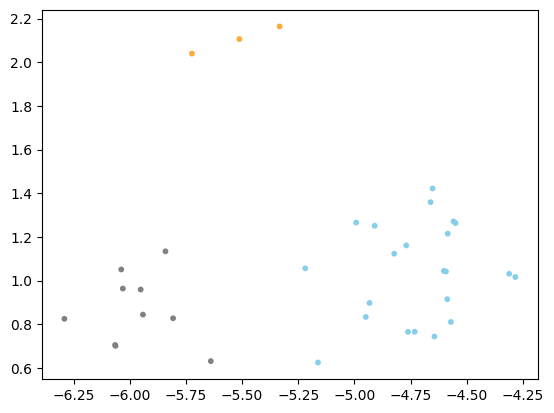

In [25]:
%matplotlib inline

X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label
X_embedded= TSNE(n_components=2, init='random').fit_transform(X_np)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1] , c=labelsNums[:len(X_embedded)], s=10, cmap= cc , alpha=1 )


In [26]:
def clsembed(snippet):
    inputs = tokenizer(snippet, padding='max_length', max_length=218, truncation=True, return_tensors='pt').to(device)
    #tokens = [self.tokenizer.cls_token] + inputs  + [self.tokenizer.sep_token]
    if(len(inputs)<512):
        with torch.no_grad():
            outs = model_codebert(**inputs)
        cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
        return cls
    else:
        print('longtest')
        i = 0
        part_vector =  []
        while ( i < len(inputs)-200) :
            #tokens = [self.tokenizer.cls_token] + inputs[i:i+250] +[self.tokenizer.sep_token]
            #tokens_ids= self.tokenizer.convert_tokens_to_ids(tokens)
            input_seg = [tokenizer.cls_token] + inputs[i:i+250] +[tokenizer.sep_token]
            with torch.no_grad():
                ots = model_codebert(**input_seg)
            cls = ots.last_hidden_state[:, 0, :].squeeze().detach()
            #cls = model_codebert(torch.tensor(inputs)[None,:])[1]
            #vector = cls[0].detach().numpy()
            parts.append(cls)
            i = i+100
        return parts

In [27]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
#labels_all = ['async wait','unordered collections','concurrency','time']
def get_class_rep(post_train_embed, post_train_label):
    # Move each tensor to CPU, convert to numpy, and collect in a list
    #post_train_embed = [x.cpu().numpy() for x in post_train_embed]
    # If you want to combine them into a single array (assuming they have the same shape)
    #post_train_embed = np.concatenate(post_train_embed, axis=0)
    representatives = [None] * 3
    for label in range(3):
        indices = np.where(np.atleast_1d(post_train_label) == label)[0]  # Get the indices as an array
        class_vectors = [post_train_embed[i] for i in indices]  # Access each index individually
        class_vectors = [x.cpu().numpy() for x in class_vectors]
        representatives[label] = np.mean(class_vectors, axis=0)
    return representatives

def calculate_normalized_distance(vec1, vec2):
    # Ensure vec1 and vec2 are numpy arrays
    if not isinstance(vec1, np.ndarray):
        vec1 = vec1.cpu().detach().numpy()
    if not isinstance(vec2, np.ndarray):
        vec2 = vec2.cpu().detach().numpy()
    
    # Normalize each vector to have unit length
    norm_vec1 = vec1 / np.linalg.norm(vec1)
    norm_vec2 = vec2 / np.linalg.norm(vec2)
    
    # Calculate Euclidean (L2) distance between the normalized vectors
    distance = np.linalg.norm(norm_vec1 - norm_vec2)
    
    return distance


In [34]:
int_to_label={
    0: 'ID',
    1: 'NDOD',
    2: 'NOD'
}

def get_closest_cluster(cluster_representatives, projected_vector):
    distances = [calculate_normalized_distance(rep, projected_vector) for rep in cluster_representatives]
    for i in range(len(distances)):
        distances[i] = np.mean(distances[i])
    closest_cluster_idx = np.argmin(distances)
    return int_to_label[closest_cluster_idx]

In [35]:
embed = post_train_embed
labels = post_train_label
def predict(input_vector):
    modified_vector = siamese_network(input_vector)
    representatives = get_class_rep(embed, labels)
    return get_closest_cluster(representatives, modified_vector)
    


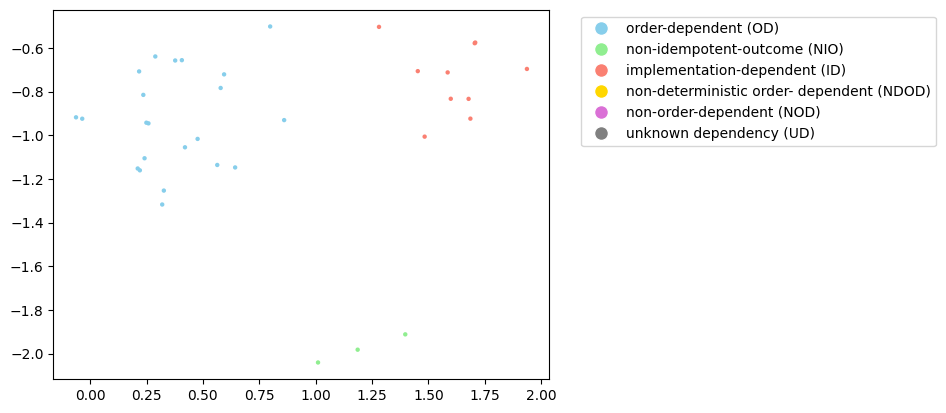

In [36]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed and post_train_label are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label

# Define vibrant colors for each category (same as used in the bar plot)
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Ensure labels are within the range of colors [0, 1, 2, 3, 4]
# Filter out invalid labels (-1) and keep only valid labels [0, 1, 2, 3, 4]
valid_indices = [i for i, label in enumerate(labelsNums) if label in [0, 1, 2]]
X_np_filtered = X_np[valid_indices]
labelsNums_filtered = [labelsNums[i] for i in valid_indices]

# Dimensionality reduction with t-SNE
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np_filtered)

# Scatter plot
for i, label in enumerate(labelsNums_filtered):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors[label], s=10, alpha=1, edgecolor='none', marker='o')

# Create legend with category labels
legend_labels = ['order-dependent (OD)', 'non-idempotent-outcome (NIO)', 'implementation-dependent (ID)', 'non-deterministic order- dependent (NDOD)', 'non-order-dependent (NOD)', 'unknown dependency (UD)']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=legend_labels,bbox_to_anchor=(1.05, 1), 
                    loc='upper left')

plt.show()


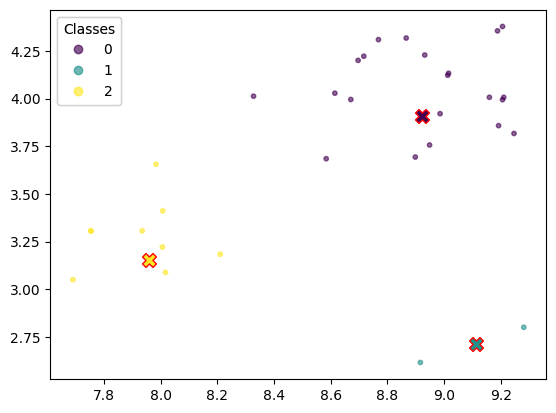

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed, post_train_label, and labelsNums are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np)

# Plot the data points
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labelsNums[:len(X_embedded)], s=10, cmap='viridis', alpha=0.6)

# Calculate class representatives
representatives = get_class_rep(post_train_embed, post_train_label)  # Make sure this function returns what you expect

# Get unique labels and their colors from the scatter plot
unique_labels = np.unique(labelsNums[:len(X_embedded)])
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# For each class representative, find the closest point and plot it
for i, rep in enumerate(representatives):
    if rep is not None:
        # Find the closest data point in the original space to this representative
        distances = np.linalg.norm(X_np - rep, axis=1)
        closest_point_index = np.argmin(distances)
        # Use the label of the closest data point to get the correct color
        label_of_closest = labelsNums[closest_point_index]
        color = scatter.cmap(scatter.norm(label_of_closest))
        plt.scatter(X_embedded[closest_point_index, 0], X_embedded[closest_point_index, 1], color=color, edgecolors='red', s=100, marker='X')

# You might want to adjust the legend to make sure it correctly represents your data
# plt.legend()
plt.show()


In [38]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Assuming 'X_embedded' is your t-SNE result and 'labelsNums' are your labels

# # Silhouette Score:
# # - Measures how similar an object is to its own cluster compared to other clusters.
# # - Range: -1 (incorrect clustering) to 1 (highly dense clustering). 
# #   A score close to 1 means that the clusters are well separated and clearly defined.
# silhouette_avg = silhouette_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Silhouette Score: {silhouette_avg}")

# # Davies-Bouldin Index:
# # - Evaluates the clustering quality by measuring the average 'similarity' between each cluster 
# #   and its most similar one. The similarity is based on a ratio of within-cluster distances to between-cluster distances.
# # - Range: 0 to +∞. Lower scores indicate better clustering quality.
# davies_bouldin = davies_bouldin_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Davies-Bouldin Index: {davies_bouldin}")

# # Calinski-Harabasz Index:
# # - Measures the cluster validity based on the ratio between the within-cluster dispersion and the between-cluster dispersion.
# # - Range: Higher values indicate better clustering quality, with no upper limit. Low values indicate clusters with high overlap.
# calinski_harabasz = calinski_harabasz_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Calinski-Harabasz Index: {calinski_harabasz}")


In [39]:
from sklearn.metrics import f1_score
 # Create reverse mapping

count = 0

# Assuming val_dataset is iterable and has 'anchor' and 'label' keys
predicted_labels = []
true_labels = []

for item in val_dataset:
    count += 1
    input_vector = item['anchor']  # Your input vector for prediction
    
    # Get predicted cluster/label
    predicted_label_str = predict(input_vector)
    
    # Ensure predicted_label is in the valid range
    if predicted_label_str in label_to_int:
        predicted_label = label_to_int[predicted_label_str]
        predicted_labels.append(predicted_label)
    else:
        print(f"Warning: Encountered unknown predicted label {predicted_label_str}")
        continue

    # True label
    true_label_int = int(item['label'])  # Assuming 'label' contains the true label as integer
    if true_label_int in int_to_label:
        true_labels.append(true_label_int)
    else:
        print(f"Warning: Encountered unknown true label {true_label_int}")
        continue

    print(count, "Predicted:", predicted_label, "True:", true_label_int)

# Filter out any invalid entries where predicted or true labels are missing
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label and predicted_labels[i] in int_to_label]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

print("Loop completed")

# Calculate F1 Score, ignoring unknown labels
f1 = f1_score(filtered_true_labels, filtered_predicted_labels, average='weighted', zero_division=0)  # Adjust 'average' as necessary
print(f"F1 Score: {f1}")


1 Predicted: 0 True: 0
2 Predicted: 0 True: 0
3 Predicted: 2 True: 2
4 Predicted: 0 True: 0
5 Predicted: 0 True: 2
6 Predicted: 0 True: 0
7 Predicted: 0 True: 1
8 Predicted: 2 True: 2
9 Predicted: 0 True: 0
Loop completed
F1 Score: 0.7296296296296297


              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         1
           2       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.57      0.56      0.54         9
weighted avg       0.73      0.78      0.73         9


 - Accuracy :  0.78
 - Precision :  0.73
 - Recall :  0.78
 - F1 score :  0.73
 - MCC :  0.61
 - AUC :  0.75


Performances by categories



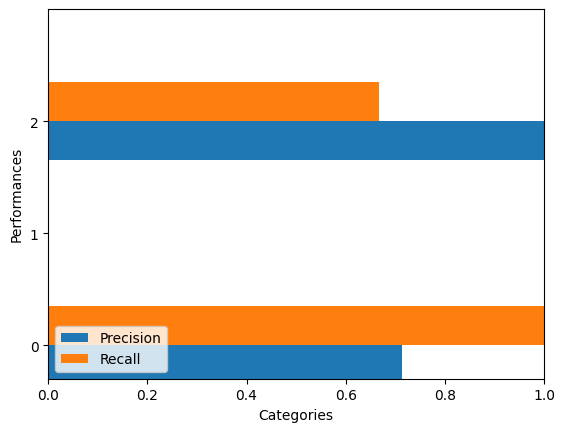



Confusion Matrix 


<AxesSubplot:>

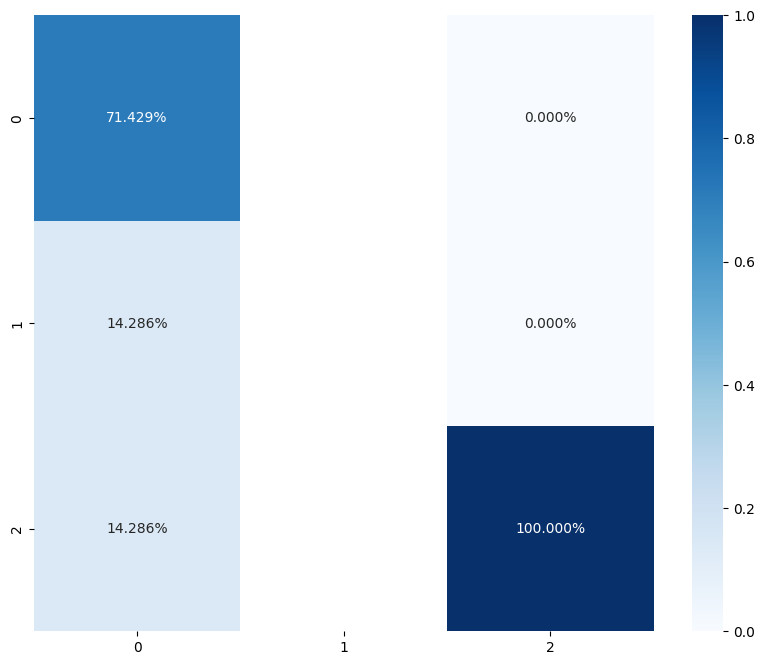

In [40]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

def multiclass_roc_auc_score(truth, pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

# Assuming predicted_labels and true_labels are already defined
predicted = predicted_labels
labels = true_labels

# Filter out 'unknown' labels
valid_indices = [i for i, label in enumerate(labels) if label != 'unknown']
filtered_labels = [labels[i] for i in valid_indices]
filtered_predicted = [predicted[i] for i in valid_indices]

unique_labels = list(set(filtered_labels))
print(classification_report(filtered_labels, filtered_predicted))

print('\n - Accuracy : ', np.round(metrics.accuracy_score(filtered_labels, filtered_predicted), 2))
print(' - Precision : ', np.round(metrics.precision_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - Recall : ', np.round(metrics.recall_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - F1 score : ', np.round(metrics.f1_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - MCC : ', np.round(metrics.matthews_corrcoef(filtered_labels, filtered_predicted), 2))
print(' - AUC : ', np.round(multiclass_roc_auc_score(filtered_labels, filtered_predicted), 2))

print("\n\nPerformances by categories\n")

ind = np.arange(len(unique_labels)) 
width = 0.35
fig, ax = plt.subplots()
precision = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[0]
recall = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[1]
ax.barh(ind - width/2, precision, width, label='Precision')
ax.barh(ind + width/2, recall, width, label='Recall')
ax.set(yticks=ind, yticklabels=np.array(unique_labels), ylim=[2*width - 1, len(ind)])
plt.xlim(0, 1)
ax.legend(loc='lower left')
ax.set_ylabel("Performances")
ax.set_xlabel("Categories")
plt.show()

print("\n\nConfusion Matrix ")

mat = confusion_matrix(filtered_labels, filtered_predicted, labels=unique_labels)
df_cm = pd.DataFrame(mat, index=[i for i in unique_labels], columns=[i for i in unique_labels])
plt.figure(figsize=(10, 8))
sn.heatmap(df_cm / np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')


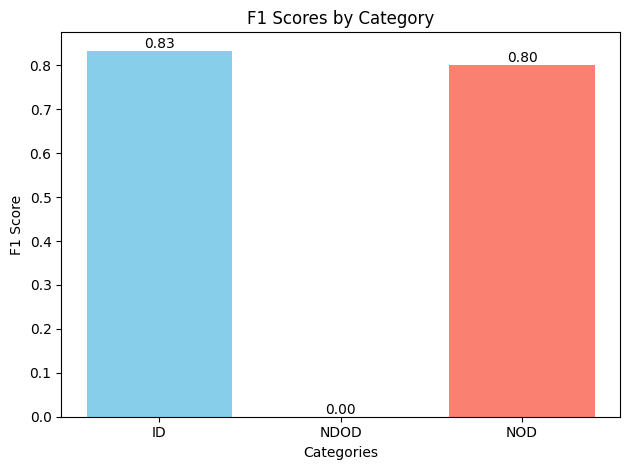

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
shortened_labels = {
    'OD': 'OD',
    'NIO': 'NIO',
    'ID': 'ID',
    'NDOD': 'NDOD',
    'NOD': 'NOD',
    'UD': 'UD'
}
# Assuming you have the predicted and true labels as per your previous code
# predicted_labels and true_labels should be lists of labels
# Filter out invalid labels from both true and predicted labels
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label.keys() and predicted_labels[i] in int_to_label.keys()]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

# Calculate F1 scores for each category
f1_scores = []
categories = list(int_to_label.keys())
for category in categories:
    true_bin = [1 if label == category else 0 for label in filtered_true_labels]
    pred_bin = [1 if label == category else 0 for label in filtered_predicted_labels]
    f1 = f1_score(true_bin, pred_bin, zero_division=0)
    f1_scores.append(f1)

# Define vibrant colors for each category
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Create bar plot with shortened category names and vibrant colors
shortened_categories = [shortened_labels[int_to_label[category]] for category in categories]
fig, ax = plt.subplots()
bars = ax.bar(shortened_categories, f1_scores, color=colors)

# Add F1 scores on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  
                textcoords="offset points", ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Categories')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Category')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [42]:
# file_path = 'test_data_predictions.csv'

# # Load the compressed CSV file into a DataFrame
# df = pd.read_csv(file_path)

# # Extract the 'TrueLabel' and 'PredictedLabel' columns into separate variables
# labels_flaky = df['TrueLabel'].tolist()
# predicted_flaky = df['PredictedLabel'].tolist()

# print (classification_report(labels, predicted))

# print('\n - Accuracy : ' , np.round( metrics.accuracy_score(labels_flaky,  predicted_flaky) , 2))
# print(' - Precision : ' , np.round( metrics.precision_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - Recall : ' , np.round( metrics.recall_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - F1 score : ' , np.round( metrics.f1_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - MCC : ' , np.round( metrics.matthews_corrcoef(labels_flaky,  predicted_flaky) , 2))
# print(' - AUC : ' , np.round( multiclass_roc_auc_score(labels_flaky,  predicted_flaky),2) )

# print("\n\nPerfomnaces by categories\n")


# ind = np.arange(len(unique_labels)) 
# width = 0.35
# fig, ax = plt.subplots()
# precision = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[0]
# recall = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[1]
# ax.barh(ind - width/2, precision, width, label='Precision')
# ax.barh(ind + width/2, recall, width, label='Recall')
# ax.set(yticks=ind + width, yticklabels=np.array(unique_labels),
# ylim=[2*width - 1, len(ind)])
# plt.xlim(0,1)
# ax.legend(loc='upper right')
# ax.set_xlabel("Performances")
# ax.set_ylabel("Categories")
# plt.show()

# print("\n\nConfusion Matrix ")

# mat = confusion_matrix(labels_flaky,  predicted_flaky, labels=unique_labels)
# df_cm = pd.DataFrame(mat, index = [i for i in unique_labels], columns = [i for i in unique_labels])
# plt.figure(figsize = (10,8))
# sn.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')

In [43]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# precision_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[0]
# recall_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[1]
# # And assuming 'unique_labels' is defined as before

# ind = np.arange(len(unique_labels))  # the x locations for the groups
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the figure size as needed

# # Using a set of contrasting, darker colors
# colors = ['blue', 'green', 'red', 'orange']

# # Plotting Precision and Recall for Your Model
# rects1 = ax.bar(ind - width*1.5, precision_our_model, width, label='Our Precision', color=colors[0])
# rects2 = ax.bar(ind - width/2, recall_our_model, width, label='Our Recall', color=colors[1])

# # Plotting Precision and Recall for Flaky Model
# rects3 = ax.bar(ind + width/2, precision_flaky, width, label='FlakyCat Precision', color=colors[2])
# rects4 = ax.bar(ind + width*1.5, recall_flaky, width, label='FlakyCat Recall', color=colors[3])

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Class-wise Precision and Recall for Our Model vs. FlakyCat Model')
# ax.set_xticks(ind)
# ax.set_xticklabels(unique_labels, rotation=45, ha="right")  # Rotate for better label visibility
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the figure

# # Optional: Adding scores above bars
# ax.bar_label(rects1, padding=3, fmt='%.2f')
# ax.bar_label(rects2, padding=3, fmt='%.2f')
# ax.bar_label(rects3, padding=3, fmt='%.2f')
# ax.bar_label(rects4, padding=3, fmt='%.2f')

# fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend outside

# plt.show()


In [44]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming metrics have been calculated and stored in variables for both models.
# # Example metric variables: accuracy, precision, recall, f1_score, mcc, auc for the original model
# # And similarly named variables with a '_flaky' suffix for the comparison model.

# metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC']
# your_model_metrics = [
#     np.round(metrics.accuracy_score(labels, predicted), 2),
#     np.round(metrics.precision_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.recall_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.f1_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels, predicted), 2),
#     np.round(multiclass_roc_auc_score(labels, predicted), 2)
# ]

# flaky_model_metrics = [
#     np.round(metrics.accuracy_score(labels_flaky, predicted_flaky), 2),
#     np.round(metrics.precision_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.recall_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.f1_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels_flaky, predicted_flaky), 2),
#     np.round(multiclass_roc_auc_score(labels_flaky, predicted_flaky), 2)
# ]

# x = np.arange(len(metrics_labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, your_model_metrics, width, label='Our Model')
# rects2 = ax.bar(x + width/2, flaky_model_metrics, width, label='FlakyCat Model')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Metrics Comparison between Our Model and FlakyCat Model')
# ax.set_xticks(x)
# ax.set_xticklabels(metrics_labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()


In [45]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# def extract_projections(siamese_network, dataloader):
#     projections = []
#     labels = []
#     for batch in dataloader:
#         label = batch["label"]
#         anchor = batch["anchor"]
#         projection = siamese_network(anchor)
        
#         projections.append(projection.cpu().detach().numpy())
#         labels.append(label.numpy())
#     projections = np.vstack(projections)
#     labels = np.hstack(labels)
#     return projections, labels

In [46]:
# projections, labels = extract_projections(siamese_network, train_dataloader)
# val_projections, val_labels = extract_projections(siamese_network, val_dataloader)

In [47]:
# print(len(projections), len(train_dataloader))

In [48]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(projections, labels)

# # Train SVM Classifier
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(projections, labels)

In [49]:
# # Evaluate Random Forest Classifier
# rf_predictions = rf_classifier.predict(val_projections)
# rf_accuracy = accuracy_score(val_labels, rf_predictions)
# rf_f1 = f1_score(val_labels, rf_predictions, average='weighted')
# print(f"Random Forest Classifier Accuracy: {rf_accuracy}, F1: {rf_f1}")

# # Evaluate SVM Classifier
# svm_predictions = svm_classifier.predict(val_projections)
# svm_accuracy = accuracy_score(val_labels, svm_predictions)
# svm_f1 = f1_score(val_labels, svm_predictions, average='weighted')
# print(f"SVM Classifier Accuracy: {svm_accuracy}, F1:{svm_f1}")